<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/VG_FeatureExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 try:
    %tensorflow_version 2.x
except:
    pass

In [70]:
import tensorflow as tf
import tensorflow_hub as hub
print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.1.0-rc1
• Using TensorFlow Hub Version:  0.7.0
• GPU Device Not Found. Running on CPU


In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
from io import StringIO
import numpy as np
import PIL.Image as Image

In [73]:
%pip install visual_genome

In [0]:
from visual_genome import api
ids = api.get_all_image_ids()

In [82]:
print(len(ids))

108077


In [75]:
MOBILENET_V2_FEATURE_EXTRACTOR_URI = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
PIXEL =224
INPUT_IMAGE_SIZE = (PIXEL, PIXEL)
OUTPUT_FEATURE_VECTOR_SIZE = 1280
feature_extractor = hub.KerasLayer(MOBILENET_V2_FEATURE_EXTRACTOR_URI,
                                   input_shape=INPUT_IMAGE_SIZE + (3,), 
                                   output_shape=[OUTPUT_FEATURE_VECTOR_SIZE],
                                   trainable=False)
model = tf.keras.Sequential([
        feature_extractor
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
def resize_image(image):
    #print("resizing:") 
    resized_img = image.resize(INPUT_IMAGE_SIZE)
    #resized_img.show()
    resized_img_arr = np.array(resized_img)/255.0
    return resized_img_arr

In [0]:
def getRegionDetails(vg, image_data, region):
    newImg =image_data.crop((region.x, region.y, region.x + region.width, region.y + region.height))
    descp = region.phrase
    return newImg, descp

In [0]:
def getImageEmbedding(regionImage, model):
    resizedImage = resize_image(regionImage)
    #plt.imshow(resizedImage)
    #plt.show()
    embedding = model.predict(resizedImage[np.newaxis, ...])
    #print(embedding)
    return embedding,resizedImage

In [0]:
def getTextEmbedding(text):
    return 1

In [0]:
def getImageDetails(api, id):

    imageID  = ids[id]
    imageData = api.get_image_data(imageID)
    imageName =  str(imageID) + ' '
    imageGet = tf.keras.utils.get_file(imageName, imageData.url)
    imageRead = Image.open(imageGet)
    
    regionImageArr = []
    regionDescriptionArr = []
    imageEmbeddingArr = [] 
    textEmbeddingArr = []
    
    regDescp = api.get_region_descriptions_of_image(imageID)
    for region in regDescp:
      regionImage, regionDescription = getRegionDetails(api, imageRead, region)
      #print (regionDescription)
      imageEmbedding = getImageEmbedding(regionImage, model)
      textEmbedding = getTextEmbedding(regionDescription)

      regionImageArr.append(regionImage)
      regionDescriptionArr.append(regionDescription)
      imageEmbeddingArr.append(imageEmbedding)
      textEmbeddingArr.append(textEmbedding)

    return regionImageArr, regionDescriptionArr, imageEmbeddingArr, textEmbeddingArr

In [0]:
id = 100
imarr, strarr, embar, textemb = getImageDetails(api, id)

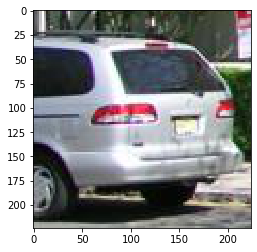

A mini van parked on the side of the road.


In [139]:
id = 2
regionImage = imarr[id]
resizedImage = resize_image(regionImage)
plt.imshow(resizedImage)
plt.show()
print (strarr[id])
#print (embar[id])